## Readme

Aşağıda verilen notebook da öncelikle ML bazlı timeseries prediction için gerekli olan feature uzayını üretiyoruz. 

Bunun için `indb_ts.py` isimli bir helper yazdık lütfen inceleyiniz.

Featureları ürettikten sonra klasik makine öğrenmesi mantığında olduğu gibi tahmin edilecek bir geleceği test kümesi olarak ayırıyoruz ve öncesini training verisi olarak kullanıyoruz. Modeli öncelikli olarak XGBRegressor kullarak eğitik ancak sonrasında göreceğiniz üzere verticapy içinde bulunan automl kullarak bir leaderboard çalışması da yapacağız.

In [21]:
from indb_ts import ts_feature_sql
from verticapy.utilities import drop


In [22]:
print(
    ts_feature_sql(
        "bike_trip_daily",
        ts="starttime_dt",
        target="n",
        schema="nyc",
        ar_range=(31, 65),
    )
)


SELECT starttime_dt as ts,
       n as y_true,
       year(starttime_dt) as y,
       month(starttime_dt) as m,
       day(starttime_dt) as dow,
       dayofyear(starttime_dt) as doy,
       week(starttime_dt) as w,
       quarter(starttime_dt) as q,
       lag(n, 31) OVER(ORDER BY starttime_dt) as lag_31,
       lag(n, 32) OVER(ORDER BY starttime_dt) as lag_32,
       lag(n, 33) OVER(ORDER BY starttime_dt) as lag_33,
       lag(n, 34) OVER(ORDER BY starttime_dt) as lag_34,
       lag(n, 35) OVER(ORDER BY starttime_dt) as lag_35,
       lag(n, 36) OVER(ORDER BY starttime_dt) as lag_36,
       lag(n, 37) OVER(ORDER BY starttime_dt) as lag_37,
       lag(n, 38) OVER(ORDER BY starttime_dt) as lag_38,
       lag(n, 39) OVER(ORDER BY starttime_dt) as lag_39,
       lag(n, 40) OVER(ORDER BY starttime_dt) as lag_40,
       lag(n, 41) OVER(ORDER BY starttime_dt) as lag_41,
       lag(n, 42) OVER(ORDER BY starttime_dt) as lag_42,
       lag(n, 43) OVER(ORDER BY starttime_dt) as lag_43,
       l

In [23]:
import verticapy as vp
from verticapy import vDataFrame

# Creating a new connection
vp.new_connection(
    {
        "host": "172.12.2.10",
        "port": "5433",
        "database": "vsunny",
        "password": "xxx",
        "user": "dbadmin",
    },
    name="MyVerticaConnection",
)

# Connecting to the Database
vp.connect("MyVerticaConnection")
vp.create_verticapy_schema()


In [24]:
drop(name="nyc.bike_trip_daily_features")


True

In [25]:
X = vDataFrame(
    sql=ts_feature_sql(
        "bike_trip_daily",
        ts="starttime_dt",
        target="n",
        schema="nyc",
        ar_range=(31, 65),
    )
)


,📅tsDate,123y_trueInt,123yInt,123mInt,123dowInt,123doyInt,123wInt,123qInt,123lag_31Int,123lag_32Int,123lag_33Int,123lag_34Int,123lag_35Int,123lag_36Int,123lag_37Int,123lag_38Int,123lag_39Int,123lag_40Int,123lag_41Int,123lag_42Int,123lag_43Int,123lag_44Int,123lag_45Int,123lag_46Int,123lag_47Int,123lag_48Int,123lag_49Int,123lag_50Int,123lag_51Int,123lag_52Int,123lag_53Int,123lag_54Int,123lag_55Int,123lag_56Int,123lag_57Int,123lag_58Int,123lag_59Int,123lag_60Int,123lag_61Int,123lag_62Int,123lag_63Int,123lag_64Int,123mean31_65Float,123min31_65Int,123max31_65Int
1,2013-07-01,16650,2013,7,1,182,27,3,[null],[null],[null],[null],[null],[null],[null],[null],[null],[null],[null],[null],[null],[null],[null],[null],[null],[null],[null],[null],[null],[null],[null],[null],[null],[null],[null],[null],[null],[null],[null],[null],[null],[null],[null],[null],[null]
2,2013-07-02,22745,2013,7,2,183,27,3,[null],[null],[null],[null],[null],[null],[null],[null],[null],[null],[null],[null],[null],[null],[null],[null],[null],[null],[null],[null],[null],[null],[null],[null],[null],[null],[null],[null],[null],[null],[null],[null],[null],[null],[null],[null],[null]
3,2013-07-03,21864,2013,7,3,184,27,3,[null],[null],[null],[null],[null],[null],[null],[null],[null],[null],[null],[null],[null],[null],[null],[null],[null],[null],[null],[null],[null],[null],[null],[null],[null],[null],[null],[null],[null],[null],[null],[null],[null],[null],[null],[null],[null]
4,2013-07-04,22326,2013,7,4,185,27,3,[null],[null],[null],[null],[null],[null],[null],[null],[null],[null],[null],[null],[null],[null],[null],[null],[null],[null],[null],[null],[null],[null],[null],[null],[null],[null],[null],[null],[null],[null],[null],[null],[null],[null],[null],[null],[null]
5,2013-07-05,21842,2013,7,5,186,27,3,[null],[null],[null],[null],[null],[null],[null],[null],[null],[null],[null],[null],[null],[null],[null],[null],[null],[null],[null],[null],[null],[null],[null],[null],[null],[null],[null],[null],[null],[null],[null],[null],[null],[null],[null],[null],[null]
6,2013-07-06,20467,2013,7,6,187,27,3,[null],[null],[null],[null],[null],[null],[null],[null],[null],[null],[null],[null],[null],[null],[null],[null],[null],[null],[null],[null],[null],[null],[null],[null],[null],[null],[null],[null],[null],[null],[null],[null],[null],[null],[null],[null],[null]
7,2013-07-07,20477,2013,7,7,188,28,3,[null],[null],[null],[null],[null],[null],[null],[null],[null],[null],[null],[null],[null],[null],[null],[null],[null],[null],[null],[null],[null],[null],[null],[null],[null],[null],[null],[null],[null],[null],[null],[null],[null],[null],[null],[null],[null]
8,2013-07-08,21615,2013,7,8,189,28,3,[null],[null],[null],[null],[null],[null],[null],[null],[null],[null],[null],[null],[null],[null],[null],[null],[null],[null],[null],[null],[null],[null],[null],[null],[null],[null],[null],[null],[null],[null],[null],[null],[null],[null],[null],[null],[null]
9,2013-07-09,26641,2013,7,9,190,28,3,[null],[null],[null],[null],[null],[null],[null],[null],[null],[null],[null],[null],[null],[null],[null],[null],[null],[null],[null],[null],[null],[null],[null],[null],[null],[null],[null],[null],[null],[null],[null],[null],[null],[null],[null],[null],[null]
10,2013-07-10,25732,2013,7,10,191,28,3,[null],[null],[null],[null],[null],[null],[null],[null],[null],[null],[null],[null],[null],[null],[null],[null],[null],[null],[null],[null],[null],[null],[null],[null],[null],[null],[null],[null],[null],[null],[null],[null],[null],[null],[null],[null],[null]

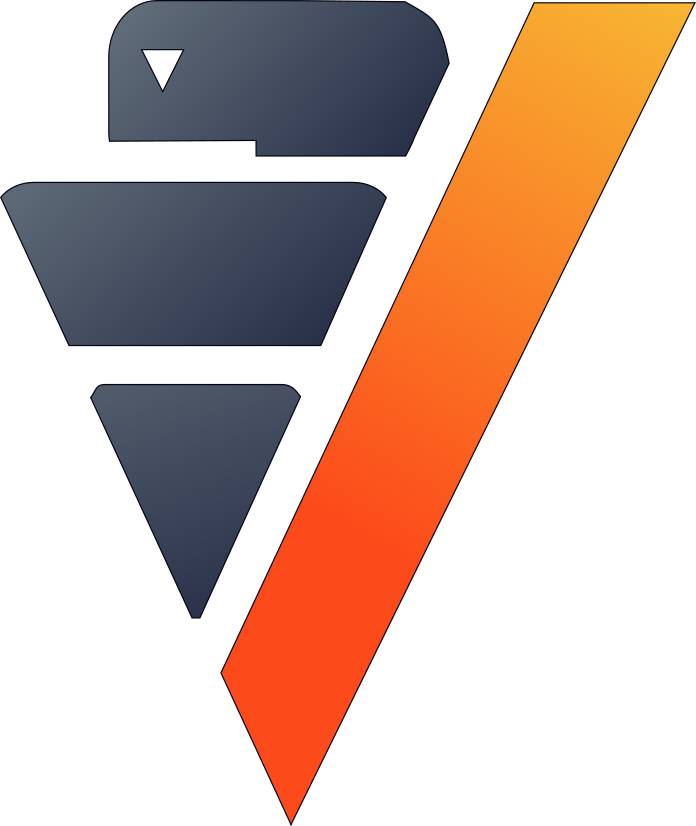

In [26]:
X.to_db(inplace=True, name="nyc.bike_trip_daily_features")


In [27]:
test = X.search("ts >= '2016-12-01'::date")
train = X.search("ts < '2016-12-01'::date")


In [28]:
len(test)


31

In [29]:
len(train)


1245

In [30]:
from verticapy.learn.ensemble import XGBoostRegressor


In [31]:
xgb = XGBoostRegressor("nyc.xr")


In [32]:
xgb.fit(train, train.get_columns(["ts", "starttime_dt", "n", "y_true"]), y="y_true")




call_string
xgb_regressor('nyc.xr', '"nyc"."_verticapy_tmp_view_dbadmin_4766453_441605944_"', '"y_true"', '"y", "m", "dow", "doy", "w", "q", "lag_31", "lag_32", "lag_33", "lag_34", "lag_35", "lag_36", "lag_37", "lag_38", "lag_39", "lag_40", "lag_41", "lag_42", "lag_43", "lag_44", "lag_45", "lag_46", "lag_47", "lag_48", "lag_49", "lag_50", "lag_51", "lag_52", "lag_53", "lag_54", "lag_55", "lag_56", "lag_57", "lag_58", "lag_59", "lag_60", "lag_61", "lag_62", "lag_63", "lag_64", "mean31_65", "min31_65", "max31_65"' USING PARAMETERS exclude_columns='', max_ntree=10, max_depth=5, learning_rate=0.1, min_split_loss=0, weight_reg=0, nbins=32, objective=squarederror, sampling_size=1, col_sample_by_tree=1, col_sample_by_node=1)

details
predictor|      type      
---------+----------------
    y    |      int       
    m    |      int       
   dow   |      int       
   doy   |      int       
    w    |      int       
    q    |      int       
 lag_31  |      int       
 lag_32  |      in

,📅tsDate,123y_trueInteger,123yInteger,123mInteger,123dowInteger,123doyInteger,123wInteger,123qInteger,123lag_31Integer,123lag_32Integer,123lag_33Integer,123lag_34Integer,123lag_35Integer,123lag_36Integer,123lag_37Integer,123lag_38Integer,123lag_39Integer,123lag_40Integer,123lag_41Integer,123lag_42Integer,123lag_43Integer,123lag_44Integer,123lag_45Integer,123lag_46Integer,123lag_47Integer,123lag_48Integer,123lag_49Integer,123lag_50Integer,123lag_51Integer,123lag_52Integer,123lag_53Integer,123lag_54Integer,123lag_55Integer,123lag_56Integer,123lag_57Integer,123lag_58Integer,123lag_59Integer,123lag_60Integer,123lag_61Integer,123lag_62Integer,123lag_63Integer,123lag_64Integer,123mean31_65Float(22),123min31_65Integer,123max31_65Integer,123y_predFloat(22)
1,2016-12-01,43242,2016,12,1,336,49,4,50082,37765,42514,46242,21058,52484,52681,55261,41463,25303,40873,63674,69772,68240,62657,48870,51992,60566,61217,57690,58768,52255,21689,34625,65896,67585,65053,60379,56384,41023,39811,21381,55578,59464,50618.3142857143,21058,69772,30773.325159446
2,2016-12-02,42371,2016,12,2,337,49,4,55967,50082,37765,42514,46242,21058,52484,52681,55261,41463,25303,40873,63674,69772,68240,62657,48870,51992,60566,61217,57690,58768,52255,21689,34625,65896,67585,65053,60379,56384,41023,39811,21381,55578,50464.6285714286,21058,69772,34963.163444033
3,2016-12-03,29854,2016,12,3,338,49,4,62144,55967,50082,37765,42514,46242,21058,52484,52681,55261,41463,25303,40873,63674,69772,68240,62657,48870,51992,60566,61217,57690,58768,52255,21689,34625,65896,67585,65053,60379,56384,41023,39811,21381,50541.2,21058,69772,31232.4244068277
4,2016-12-04,27455,2016,12,4,339,50,4,59641,62144,55967,50082,37765,42514,46242,21058,52484,52681,55261,41463,25303,40873,63674,69772,68240,62657,48870,51992,60566,61217,57690,58768,52255,21689,34625,65896,67585,65053,60379,56384,41023,39811,50657.2857142857,21058,69772,31043.4109076848
5,2016-12-05,35932,2016,12,5,340,50,4,57877,59641,62144,55967,50082,37765,42514,46242,21058,52484,52681,55261,41463,25303,40873,63674,69772,68240,62657,48870,51992,60566,61217,57690,58768,52255,21689,34625,65896,67585,65053,60379,56384,41023,51700.0285714286,21058,69772,33177.8078625959
6,2016-12-06,33332,2016,12,6,341,50,4,48689,57877,59641,62144,55967,50082,37765,42514,46242,21058,52484,52681,55261,41463,25303,40873,63674,69772,68240,62657,48870,51992,60566,61217,57690,58768,52255,21689,34625,65896,67585,65053,60379,56384,51953.6857142857,21058,69772,32795.5293226479
7,2016-12-07,38021,2016,12,7,342,50,4,39413,48689,57877,59641,62144,55967,50082,37765,42514,46242,21058,52484,52681,55261,41463,25303,40873,63674,69772,68240,62657,48870,51992,60566,61217,57690,58768,52255,21689,34625,65896,67585,65053,60379,51907.6857142857,21058,69772,32795.5293226479
8,2016-12-08,39626,2016,12,8,343,50,4,49890,39413,48689,57877,59641,62144,55967,50082,37765,42514,46242,21058,52484,52681,55261,41463,25303,40873,63674,69772,68240,62657,48870,51992,60566,61217,57690,58768,52255,21689,34625,65896,67585,65053,51722.1428571429,21058,69772,32795.5293226479
9,2016-12-09,33547,2016,12,9,344,50,4,56603,49890,39413,48689,57877,59641,62144,55967,50082,37765,42514,46242,21058,52484,52681,55261,41463,25303,40873,63674,69772,68240,62657,48870,51992,60566,61217,57690,58768,52255,21689,34625,65896,67585,51614.2571428571,21058,69772,33652.8077673935
10,2016-12-10,22379,2016,12,10,345,50,4,38060,56603,49890,39413,48689,57877,59641,62144,55967,50082,37765,42514,46242,21058,52484,52681,55261,41463,25303,40873,63674,69772,68240,62657,48870,51992,60566,61217,57690,58768,52255,21689,34625,65896,50843.0285714286,21058,69772,30208.4517680873

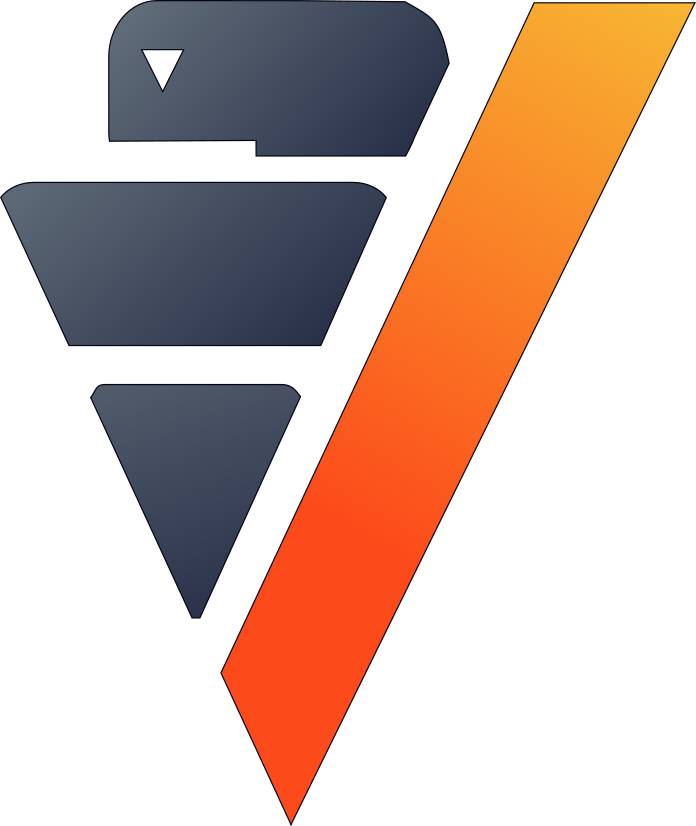

In [33]:
xgb.predict(test, name="y_pred")


,📅tsDate,123y_trueInteger,123yInteger,123mInteger,123dowInteger,123doyInteger,123wInteger,123qInteger,123lag_31Integer,123lag_32Integer,123lag_33Integer,123lag_34Integer,123lag_35Integer,123lag_36Integer,123lag_37Integer,123lag_38Integer,123lag_39Integer,123lag_40Integer,123lag_41Integer,123lag_42Integer,123lag_43Integer,123lag_44Integer,123lag_45Integer,123lag_46Integer,123lag_47Integer,123lag_48Integer,123lag_49Integer,123lag_50Integer,123lag_51Integer,123lag_52Integer,123lag_53Integer,123lag_54Integer,123lag_55Integer,123lag_56Integer,123lag_57Integer,123lag_58Integer,123lag_59Integer,123lag_60Integer,123lag_61Integer,123lag_62Integer,123lag_63Integer,123lag_64Integer,123mean31_65Float(22),123min31_65Integer,123max31_65Integer,123y_predFloat(22)
1,2016-12-01,43242,2016,12,1,336,49,4,50082,37765,42514,46242,21058,52484,52681,55261,41463,25303,40873,63674,69772,68240,62657,48870,51992,60566,61217,57690,58768,52255,21689,34625,65896,67585,65053,60379,56384,41023,39811,21381,55578,59464,50618.3142857143,21058,69772,30773.325159446
2,2016-12-02,42371,2016,12,2,337,49,4,55967,50082,37765,42514,46242,21058,52484,52681,55261,41463,25303,40873,63674,69772,68240,62657,48870,51992,60566,61217,57690,58768,52255,21689,34625,65896,67585,65053,60379,56384,41023,39811,21381,55578,50464.6285714286,21058,69772,34963.163444033
3,2016-12-03,29854,2016,12,3,338,49,4,62144,55967,50082,37765,42514,46242,21058,52484,52681,55261,41463,25303,40873,63674,69772,68240,62657,48870,51992,60566,61217,57690,58768,52255,21689,34625,65896,67585,65053,60379,56384,41023,39811,21381,50541.2,21058,69772,31232.4244068277
4,2016-12-04,27455,2016,12,4,339,50,4,59641,62144,55967,50082,37765,42514,46242,21058,52484,52681,55261,41463,25303,40873,63674,69772,68240,62657,48870,51992,60566,61217,57690,58768,52255,21689,34625,65896,67585,65053,60379,56384,41023,39811,50657.2857142857,21058,69772,31043.4109076848
5,2016-12-05,35932,2016,12,5,340,50,4,57877,59641,62144,55967,50082,37765,42514,46242,21058,52484,52681,55261,41463,25303,40873,63674,69772,68240,62657,48870,51992,60566,61217,57690,58768,52255,21689,34625,65896,67585,65053,60379,56384,41023,51700.0285714286,21058,69772,33177.8078625959
6,2016-12-06,33332,2016,12,6,341,50,4,48689,57877,59641,62144,55967,50082,37765,42514,46242,21058,52484,52681,55261,41463,25303,40873,63674,69772,68240,62657,48870,51992,60566,61217,57690,58768,52255,21689,34625,65896,67585,65053,60379,56384,51953.6857142857,21058,69772,32795.5293226479
7,2016-12-07,38021,2016,12,7,342,50,4,39413,48689,57877,59641,62144,55967,50082,37765,42514,46242,21058,52484,52681,55261,41463,25303,40873,63674,69772,68240,62657,48870,51992,60566,61217,57690,58768,52255,21689,34625,65896,67585,65053,60379,51907.6857142857,21058,69772,32795.5293226479
8,2016-12-08,39626,2016,12,8,343,50,4,49890,39413,48689,57877,59641,62144,55967,50082,37765,42514,46242,21058,52484,52681,55261,41463,25303,40873,63674,69772,68240,62657,48870,51992,60566,61217,57690,58768,52255,21689,34625,65896,67585,65053,51722.1428571429,21058,69772,32795.5293226479
9,2016-12-09,33547,2016,12,9,344,50,4,56603,49890,39413,48689,57877,59641,62144,55967,50082,37765,42514,46242,21058,52484,52681,55261,41463,25303,40873,63674,69772,68240,62657,48870,51992,60566,61217,57690,58768,52255,21689,34625,65896,67585,51614.2571428571,21058,69772,33652.8077673935
10,2016-12-10,22379,2016,12,10,345,50,4,38060,56603,49890,39413,48689,57877,59641,62144,55967,50082,37765,42514,46242,21058,52484,52681,55261,41463,25303,40873,63674,69772,68240,62657,48870,51992,60566,61217,57690,58768,52255,21689,34625,65896,50843.0285714286,21058,69772,30208.4517680873

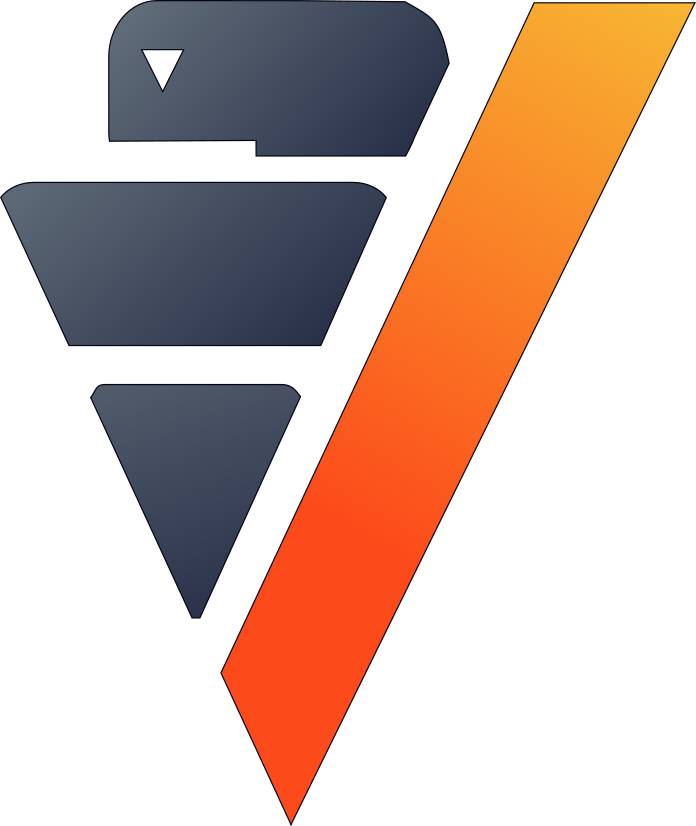

In [16]:
test


,📅tsDate,123y_trueInteger,123yInteger,123mInteger,123dowInteger,123doyInteger,123wInteger,123qInteger,123lag_31Integer,123lag_32Integer,123lag_33Integer,123lag_34Integer,123lag_35Integer,123lag_36Integer,123lag_37Integer,123lag_38Integer,123lag_39Integer,123lag_40Integer,123lag_41Integer,123lag_42Integer,123lag_43Integer,123lag_44Integer,123lag_45Integer,123lag_46Integer,123lag_47Integer,123lag_48Integer,123lag_49Integer,123lag_50Integer,123lag_51Integer,123lag_52Integer,123lag_53Integer,123lag_54Integer,123lag_55Integer,123lag_56Integer,123lag_57Integer,123lag_58Integer,123lag_59Integer,123lag_60Integer,123lag_61Integer,123lag_62Integer,123lag_63Integer,123lag_64Integer,123mean31_65Float(22),123min31_65Integer,123max31_65Integer,123y_predFloat(22)
1,2016-12-01,43242,2016,12,1,336,49,4,50082,37765,42514,46242,21058,52484,52681,55261,41463,25303,40873,63674,69772,68240,62657,48870,51992,60566,61217,57690,58768,52255,21689,34625,65896,67585,65053,60379,56384,41023,39811,21381,55578,59464,50618.3142857143,21058,69772,30773.325159446
2,2016-12-02,42371,2016,12,2,337,49,4,55967,50082,37765,42514,46242,21058,52484,52681,55261,41463,25303,40873,63674,69772,68240,62657,48870,51992,60566,61217,57690,58768,52255,21689,34625,65896,67585,65053,60379,56384,41023,39811,21381,55578,50464.6285714286,21058,69772,34963.163444033
3,2016-12-03,29854,2016,12,3,338,49,4,62144,55967,50082,37765,42514,46242,21058,52484,52681,55261,41463,25303,40873,63674,69772,68240,62657,48870,51992,60566,61217,57690,58768,52255,21689,34625,65896,67585,65053,60379,56384,41023,39811,21381,50541.2,21058,69772,31232.4244068277
4,2016-12-04,27455,2016,12,4,339,50,4,59641,62144,55967,50082,37765,42514,46242,21058,52484,52681,55261,41463,25303,40873,63674,69772,68240,62657,48870,51992,60566,61217,57690,58768,52255,21689,34625,65896,67585,65053,60379,56384,41023,39811,50657.2857142857,21058,69772,31043.4109076848
5,2016-12-05,35932,2016,12,5,340,50,4,57877,59641,62144,55967,50082,37765,42514,46242,21058,52484,52681,55261,41463,25303,40873,63674,69772,68240,62657,48870,51992,60566,61217,57690,58768,52255,21689,34625,65896,67585,65053,60379,56384,41023,51700.0285714286,21058,69772,33177.8078625959
6,2016-12-06,33332,2016,12,6,341,50,4,48689,57877,59641,62144,55967,50082,37765,42514,46242,21058,52484,52681,55261,41463,25303,40873,63674,69772,68240,62657,48870,51992,60566,61217,57690,58768,52255,21689,34625,65896,67585,65053,60379,56384,51953.6857142857,21058,69772,32795.5293226479
7,2016-12-07,38021,2016,12,7,342,50,4,39413,48689,57877,59641,62144,55967,50082,37765,42514,46242,21058,52484,52681,55261,41463,25303,40873,63674,69772,68240,62657,48870,51992,60566,61217,57690,58768,52255,21689,34625,65896,67585,65053,60379,51907.6857142857,21058,69772,32795.5293226479
8,2016-12-08,39626,2016,12,8,343,50,4,49890,39413,48689,57877,59641,62144,55967,50082,37765,42514,46242,21058,52484,52681,55261,41463,25303,40873,63674,69772,68240,62657,48870,51992,60566,61217,57690,58768,52255,21689,34625,65896,67585,65053,51722.1428571429,21058,69772,32795.5293226479
9,2016-12-09,33547,2016,12,9,344,50,4,56603,49890,39413,48689,57877,59641,62144,55967,50082,37765,42514,46242,21058,52484,52681,55261,41463,25303,40873,63674,69772,68240,62657,48870,51992,60566,61217,57690,58768,52255,21689,34625,65896,67585,51614.2571428571,21058,69772,33652.8077673935
10,2016-12-10,22379,2016,12,10,345,50,4,38060,56603,49890,39413,48689,57877,59641,62144,55967,50082,37765,42514,46242,21058,52484,52681,55261,41463,25303,40873,63674,69772,68240,62657,48870,51992,60566,61217,57690,58768,52255,21689,34625,65896,50843.0285714286,21058,69772,30208.4517680873

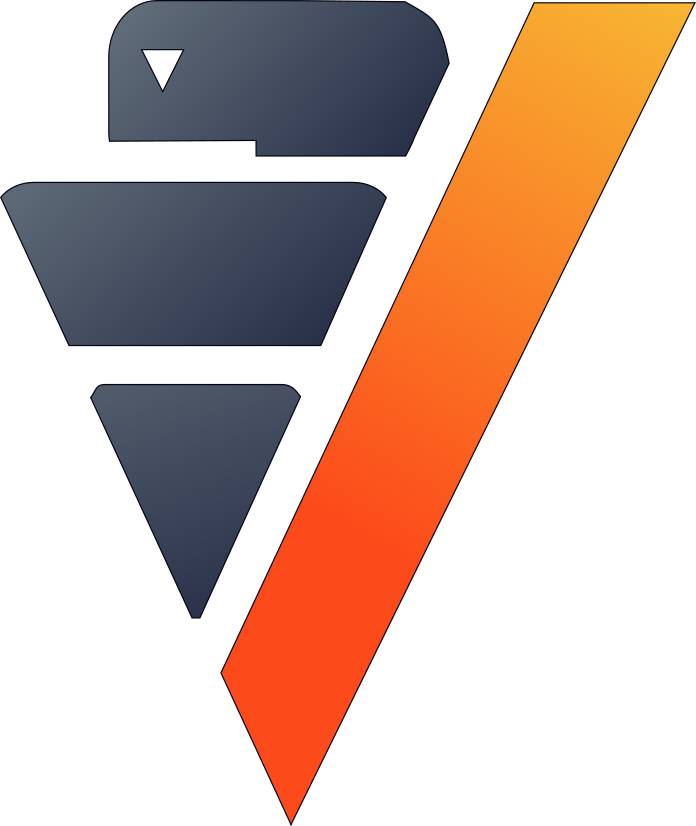

In [34]:
from verticapy.utilities import drop

drop(name="nyc.prediction_output")

test.to_db("nyc.prediction_output")


<AxesSubplot:xlabel='"ts"'>

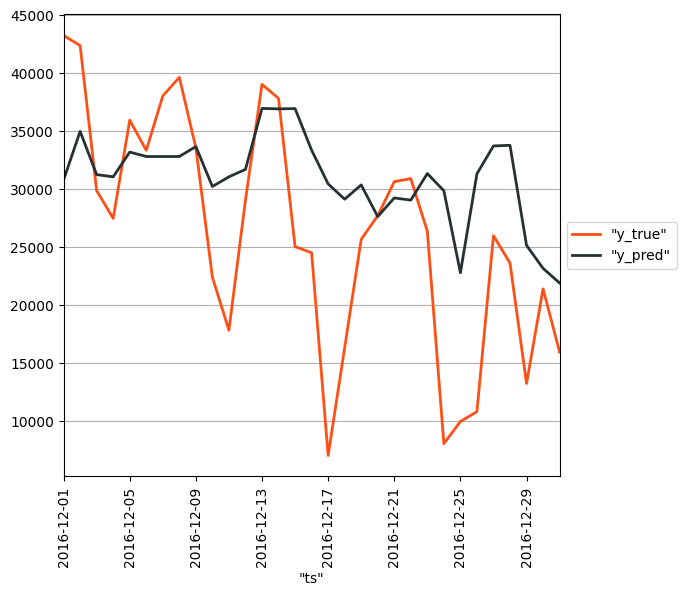

In [35]:
test.plot("ts", columns=["y_true", "y_pred"])


Bundan sonrasında aynı veri üzerine AutoML ile elimizdeki (vertica içerisindeki) bütün regressorları deneyecek ve MAE skoru minimize edeecek şekilde gidiyoruz.

AutoML hem farklı algorithmaları deniyor hem de her bir algorithma için gerekli olan hyperparameter search işlemini gerçekleştiriyor.

In [36]:
from verticapy.learn.delphi import AutoML


In [37]:
aut = AutoML("nyc.autor", estimator_type="regressor", metric="mae")


Starting AutoML



  0%|          | 0/4 [00:00<?, ?it/s]


Testing Model - LinearRegression



Model: LinearRegression; Parameters: {'tol': 1e-06, 'max_iter': 100, 'solver': 'newton'}; Test_score: 6311.152873831693; Train_score: 5993.30258910852; Time: 2.1140105724334717;


 25%|██▌       | 1/4 [00:25<01:17, 25.93s/it]

Model: LinearRegression; Parameters: {'tol': 1e-06, 'max_iter': 100, 'solver': 'bfgs'}; Test_score: 6712.148202248816; Train_score: 6387.093559706644; Time: 3.3440845807393393;
Grid Search Selected Model
LinearRegression; Parameters: {'solver': 'newton', 'penalty': 'none', 'max_iter': 100, 'tol': 1e-06}; Test_score: 6311.152873831693; Train_score: 5993.30258910852; Time: 2.1140105724334717;

Testing Model - ElasticNet



 50%|█████     | 2/4 [00:37<00:35, 17.61s/it]

Model: ElasticNet; Parameters: {'tol': 1e-06, 'max_iter': 100, 'solver': 'cgd', 'C': 1.0, 'l1_ratio': 0.5}; Test_score: 7246.6283013013635; Train_score: 6846.324795743217; Time: 1.7914899984995525;
Grid Search Selected Model
ElasticNet; Parameters: {'solver': 'cgd', 'penalty': 'enet', 'max_iter': 100, 'l1_ratio': 0.5, 'C': 1.0, 'tol': 1e-06}; Test_score: 7246.6283013013635; Train_score: 6846.324795743217; Time: 1.7914899984995525;

Testing Model - Ridge



 75%|███████▌  | 3/4 [00:47<00:13, 13.86s/it]

Model: Ridge; Parameters: {'tol': 1e-06, 'max_iter': 100, 'C': 1.0}; Test_score: 6623.953629284377; Train_score: 6185.020514238619; Time: 1.634066899617513;
Grid Search Selected Model
Ridge; Parameters: {'solver': 'newton', 'penalty': 'l2', 'max_iter': 100, 'C': 1.0, 'tol': 1e-06}; Test_score: 6623.953629284377; Train_score: 6185.020514238619; Time: 1.634066899617513;

Testing Model - Lasso



100%|██████████| 4/4 [00:58<00:00, 14.67s/it]

Model: Lasso; Parameters: {'tol': 1e-06, 'max_iter': 100, 'solver': 'cgd', 'C': 1.0}; Test_score: 6510.114235105847; Train_score: 6222.272931130757; Time: 1.7916843891143799;
Grid Search Selected Model
Lasso; Parameters: {'solver': 'cgd', 'penalty': 'l1', 'max_iter': 100, 'C': 1.0, 'tol': 1e-06}; Test_score: 6510.114235105847; Train_score: 6222.272931130757; Time: 1.7916843891143799;
Final Model

LinearRegression; Best_Parameters: {'solver': 'newton', 'penalty': 'none', 'max_iter': 100, 'tol': 1e-06}; Best_Test_score: 6311.152873831693; Train_score: 5993.30258910852; Time: 2.1140105724334717;




Starting Stepwise


  0%|          | 0/43 [00:00<?, ?it/s]

[Model 0] aic: 22409.975049010885; Variables: ['"dow"', '"doy"', '"m"', '"y"', '"w"', '"q"', '"lag_60"', '"lag_59"', '"lag_64"', '"lag_61"', '"lag_58"', '"lag_62"', '"lag_63"', '"lag_53"', '"lag_54"', '"lag_52"', '"lag_57"', '"lag_51"', '"lag_46"', '"lag_45"', '"lag_55"', '"lag_47"', '"min31_65"', '"lag_56"', '"lag_50"', '"lag_44"', '"lag_39"', '"lag_48"', '"lag_38"', '"lag_40"', '"lag_49"', '"lag_43"', '"lag_37"', '"max31_65"', '"lag_32"', '"lag_31"', '"lag_41"', '"lag_33"', '"mean31_65"', '"lag_42"', '"lag_36"', '"lag_34"', '"lag_35"']


 16%|█▋        | 7/43 [00:15<01:13,  2.06s/it]

[Model 1] aic: 22408.16434273327; (-) Variable: "lag_60"


 19%|█▊        | 8/43 [00:17<01:11,  2.03s/it]

[Model 2] aic: 22408.03992505007; (-) Variable: "lag_59"


 23%|██▎       | 10/43 [00:21<01:06,  2.02s/it]

[Model 3] aic: 22406.433790690055; (-) Variable: "lag_61"


 26%|██▌       | 11/43 [00:24<01:07,  2.12s/it]

[Model 4] aic: 22408.269841159774; (-) Variable: "lag_58"


 28%|██▊       | 12/43 [00:26<01:04,  2.08s/it]

[Model 5] aic: 22408.219331913013; (-) Variable: "lag_62"


 30%|███       | 13/43 [00:28<01:00,  2.03s/it]

[Model 6] aic: 22407.95746094; (-) Variable: "lag_63"


 33%|███▎      | 14/43 [00:30<00:58,  2.03s/it]

[Model 7] aic: 22405.847076103717; (-) Variable: "lag_53"


 35%|███▍      | 15/43 [00:32<00:56,  2.01s/it]

[Model 8] aic: 22403.761994378074; (-) Variable: "lag_54"


 37%|███▋      | 16/43 [00:34<00:54,  2.01s/it]

[Model 9] aic: 22402.90888684803; (-) Variable: "lag_52"


 40%|███▉      | 17/43 [00:35<00:50,  1.94s/it]

[Model 10] aic: 22400.7962263192; (-) Variable: "lag_57"


 42%|████▏     | 18/43 [00:37<00:48,  1.95s/it]

[Model 11] aic: 22400.112185726015; (-) Variable: "lag_51"


 44%|████▍     | 19/43 [00:39<00:47,  1.96s/it]

[Model 12] aic: 22398.339963921077; (-) Variable: "lag_46"


 47%|████▋     | 20/43 [00:41<00:45,  1.96s/it]

[Model 13] aic: 22396.287299057047; (-) Variable: "lag_45"


 49%|████▉     | 21/43 [00:43<00:43,  1.96s/it]

[Model 14] aic: 22395.54293151842; (-) Variable: "lag_55"


 51%|█████     | 22/43 [00:45<00:41,  1.95s/it]

[Model 15] aic: 22394.09198733892; (-) Variable: "lag_47"


 58%|█████▊    | 25/43 [00:52<00:40,  2.23s/it]

[Model 16] aic: 22393.53504042525; (-) Variable: "lag_50"


 60%|██████    | 26/43 [00:54<00:38,  2.29s/it]

[Model 17] aic: 22391.803441379365; (-) Variable: "lag_44"


 63%|██████▎   | 27/43 [00:57<00:39,  2.44s/it]

[Model 18] aic: 22391.98921904723; (-) Variable: "lag_39"


100%|██████████| 43/43 [01:28<00:00,  2.06s/it]


Selected Model

[Model 18] aic: 22391.98921904723; Variables: ['"dow"', '"doy"', '"m"', '"y"', '"w"', '"q"', '"lag_64"', '"min31_65"', '"lag_56"', '"lag_48"', '"lag_38"', '"lag_40"', '"lag_49"', '"lag_43"', '"lag_37"', '"max31_65"', '"lag_32"', '"lag_31"', '"lag_41"', '"lag_33"', '"mean31_65"', '"lag_42"', '"lag_36"', '"lag_34"', '"lag_35"']


,model_type,,avg_score,avg_train_score,avg_time,score_std,score_train_std,
1,LinearRegression,,6311.152873831693,5993.30258910852,2.1140105724334717,125.71925842556722,93.7603841325094,""" readonly>"
2,Lasso,,6510.114235105847,6222.272931130757,1.7916843891143799,254.12886109802776,151.2773789998178,""" readonly>"
3,Ridge,,6623.953629284377,6185.020514238619,1.634066899617513,141.54197358709516,100.78735393756145,""" readonly>"
4,LinearRegression,,6712.148202248816,6387.093559706644,3.3440845807393393,65.36949704672354,46.047701553578506,""" readonly>"
5,ElasticNet,,7246.6283013013635,6846.324795743217,1.7914899984995525,152.09508223455958,52.744493702714855,""" readonly>"

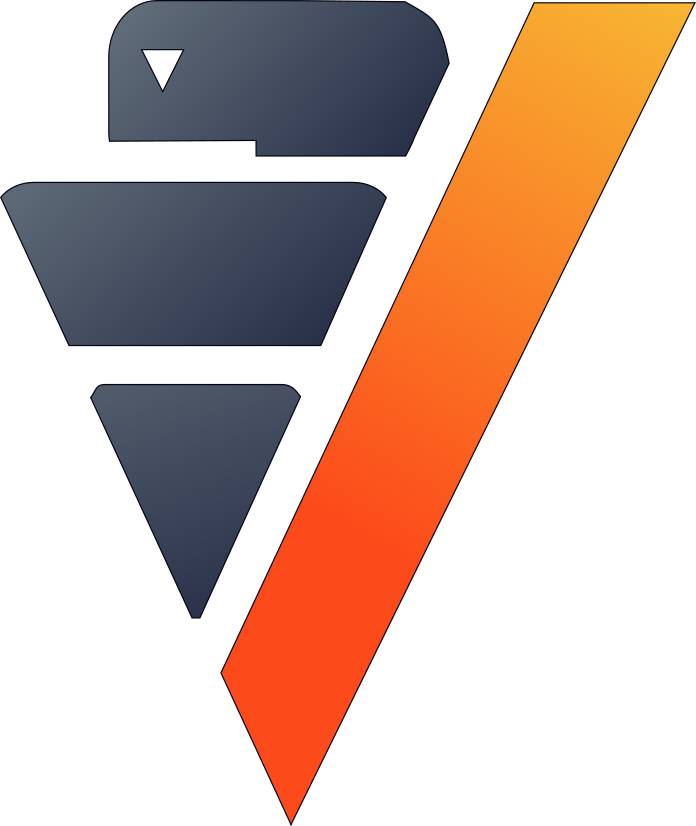

In [38]:
aut.fit(train, train.get_columns(["ts", "starttime_dt", "n", "y_true"]), y="y_true")


,📅tsDate,123y_trueInteger,123yInteger,123mInteger,123dowInteger,123doyInteger,123wInteger,123qInteger,123lag_31Integer,123lag_32Integer,123lag_33Integer,123lag_34Integer,123lag_35Integer,123lag_36Integer,123lag_37Integer,123lag_38Integer,123lag_39Integer,123lag_40Integer,123lag_41Integer,123lag_42Integer,123lag_43Integer,123lag_44Integer,123lag_45Integer,123lag_46Integer,123lag_47Integer,123lag_48Integer,123lag_49Integer,123lag_50Integer,123lag_51Integer,123lag_52Integer,123lag_53Integer,123lag_54Integer,123lag_55Integer,123lag_56Integer,123lag_57Integer,123lag_58Integer,123lag_59Integer,123lag_60Integer,123lag_61Integer,123lag_62Integer,123lag_63Integer,123lag_64Integer,123mean31_65Float(22),123min31_65Integer,123max31_65Integer,123y_predFloat(22),123y_pred_autoFloat(22)
1,2016-12-01,43242,2016,12,1,336,49,4,50082,37765,42514,46242,21058,52484,52681,55261,41463,25303,40873,63674,69772,68240,62657,48870,51992,60566,61217,57690,58768,52255,21689,34625,65896,67585,65053,60379,56384,41023,39811,21381,55578,59464,50618.3142857143,21058,69772,30773.325159446,519409486.60719
2,2016-12-02,42371,2016,12,2,337,49,4,55967,50082,37765,42514,46242,21058,52484,52681,55261,41463,25303,40873,63674,69772,68240,62657,48870,51992,60566,61217,57690,58768,52255,21689,34625,65896,67585,65053,60379,56384,41023,39811,21381,55578,50464.6285714286,21058,69772,34963.163444033,452223920.954541
3,2016-12-03,29854,2016,12,3,338,49,4,62144,55967,50082,37765,42514,46242,21058,52484,52681,55261,41463,25303,40873,63674,69772,68240,62657,48870,51992,60566,61217,57690,58768,52255,21689,34625,65896,67585,65053,60379,56384,41023,39811,21381,50541.2,21058,69772,31232.4244068277,396171771.282886
4,2016-12-04,27455,2016,12,4,339,50,4,59641,62144,55967,50082,37765,42514,46242,21058,52484,52681,55261,41463,25303,40873,63674,69772,68240,62657,48870,51992,60566,61217,57690,58768,52255,21689,34625,65896,67585,65053,60379,56384,41023,39811,50657.2857142857,21058,69772,31043.4109076848,381172537.25569
5,2016-12-05,35932,2016,12,5,340,50,4,57877,59641,62144,55967,50082,37765,42514,46242,21058,52484,52681,55261,41463,25303,40873,63674,69772,68240,62657,48870,51992,60566,61217,57690,58768,52255,21689,34625,65896,67585,65053,60379,56384,41023,51700.0285714286,21058,69772,33177.8078625959,623890992.041685
6,2016-12-06,33332,2016,12,6,341,50,4,48689,57877,59641,62144,55967,50082,37765,42514,46242,21058,52484,52681,55261,41463,25303,40873,63674,69772,68240,62657,48870,51992,60566,61217,57690,58768,52255,21689,34625,65896,67585,65053,60379,56384,51953.6857142857,21058,69772,32795.5293226479,621232469.241287
7,2016-12-07,38021,2016,12,7,342,50,4,39413,48689,57877,59641,62144,55967,50082,37765,42514,46242,21058,52484,52681,55261,41463,25303,40873,63674,69772,68240,62657,48870,51992,60566,61217,57690,58768,52255,21689,34625,65896,67585,65053,60379,51907.6857142857,21058,69772,32795.5293226479,581316640.38711
8,2016-12-08,39626,2016,12,8,343,50,4,49890,39413,48689,57877,59641,62144,55967,50082,37765,42514,46242,21058,52484,52681,55261,41463,25303,40873,63674,69772,68240,62657,48870,51992,60566,61217,57690,58768,52255,21689,34625,65896,67585,65053,51722.1428571429,21058,69772,32795.5293226479,504654954.680891
9,2016-12-09,33547,2016,12,9,344,50,4,56603,49890,39413,48689,57877,59641,62144,55967,50082,37765,42514,46242,21058,52484,52681,55261,41463,25303,40873,63674,69772,68240,62657,48870,51992,60566,61217,57690,58768,52255,21689,34625,65896,67585,51614.2571428571,21058,69772,33652.8077673935,425889613.520768
10,2016-12-10,22379,2016,12,10,345,50,4,38060,56603,49890,39413,48689,57877,59641,62144,55967,50082,37765,42514,46242,21058,52484,52681,55261,41463,25303,40873,63674,69772,68240,62657,48870,51992,60566,61217,57690,58768,52255,21689,34625,65896,50843.0285714286,21058,69772,30208.4517680873,399814649.629451

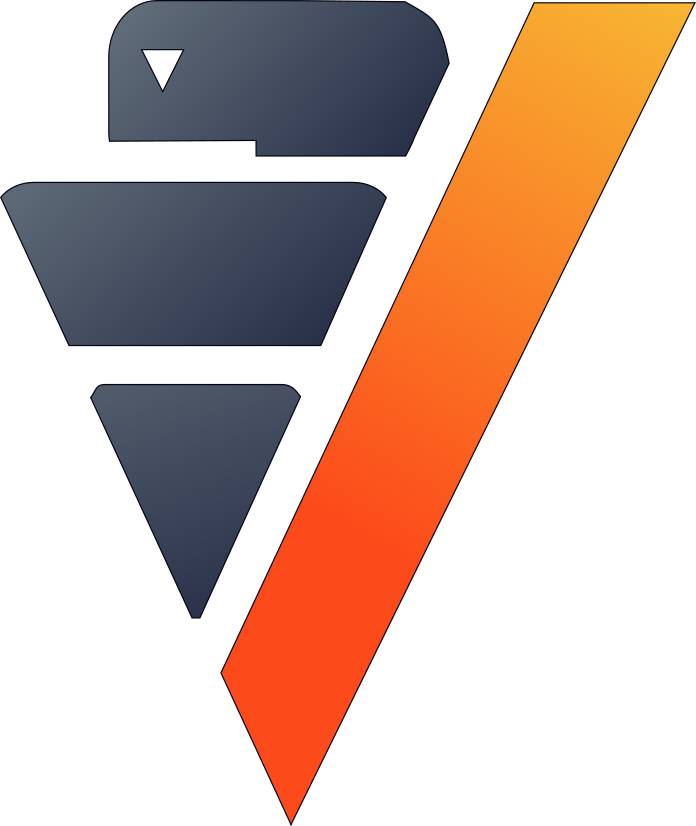

In [39]:
aut.best_model_.predict(test, name="y_pred_auto")


<AxesSubplot:xlabel='"ts"'>

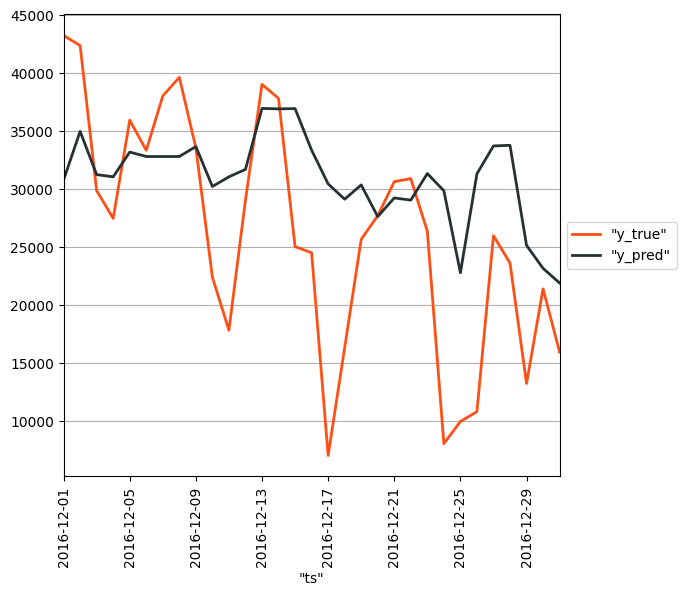

In [40]:
test.plot("ts", columns=["y_true", "y_pred"])
